In [4]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [5]:
#Fetch Images count from Fodlers

In [8]:
count = 0 
dirs = os.listdir('flower_photos//')
for dir in dirs:
    files = list(os.listdir('flower_photos/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 633 Images
dandelion Folder has 898 Images
roses Folder has 641 Images
sunflowers Folder has 699 Images
tulips Folder has 799 Images
Images Folder has 3670 Images


In [72]:
#Load Images into Arrays as Dataset

In [9]:
base_dir = 'flower_photos//'
img_size = 180
batch = 32

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
import matplotlib.pyplot as plt

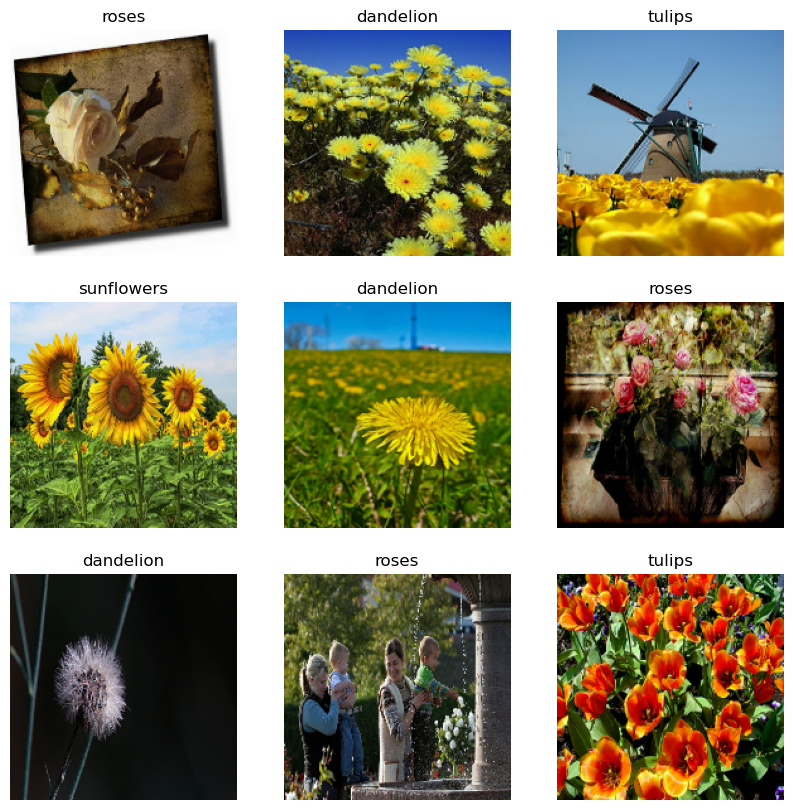

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [21]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [22]:
#Data Augmentation

In [23]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

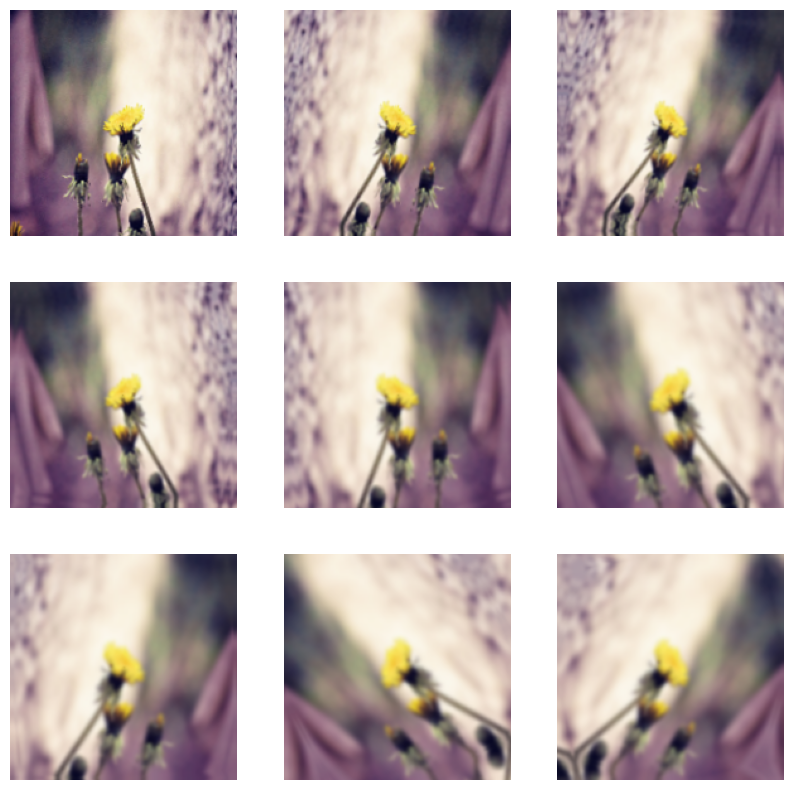

In [24]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [25]:
#MOdel Creation

In [26]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 356ms/step - accuracy: 0.6733 - loss: 0.8638 - val_accuracy: 0.6839 - val_loss: 0.8268
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 354ms/step - accuracy: 0.6920 - loss: 0.8144 - val_accuracy: 0.6785 - val_loss: 0.8054
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 355ms/step - accuracy: 0.7059 - loss: 0.7663 - val_accuracy: 0.6553 - val_loss: 0.9004
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 363ms/step - accuracy: 0.7340 - loss: 0.7394 - val_accuracy: 0.6730 - val_loss: 0.8202
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 362ms/step - accuracy: 0.7357 - loss: 0.6900 - val_accuracy: 0.7044 - val_loss: 0.7626


In [31]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [33]:
classify_images('fl.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


'The Image belongs to sunflowers with a score of 78.42539548873901'

In [37]:
import pickle

In [40]:
model.save('Flower_Recog_Model.keras')